Group project 

NIKHIL KRISHNA A R, ME20BTECH11031

DEVANANTH V, EP20BTECH11004

In [3]:
import scipy as sc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
import folium #visualize map
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar #calendar
from sklearn.cluster import KMeans #k-means clustering
from yellowbrick.cluster import KElbowVisualizer #Elbow visualize K-means
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [8]:
df=pd.read_csv("uber-raw-data-apr14.csv")
type(df.loc[0,'Date/Time'])
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
type(df.loc[0,'Date/Time'])

pandas._libs.tslibs.timestamps.Timestamp

REARRANGING THE DATA

In [9]:
df['BinnedHour']=df['Date/Time'].dt.floor('15min')
df['BinnedHour']

0        2014-04-01 00:00:00
1        2014-04-01 00:15:00
2        2014-04-01 00:15:00
3        2014-04-01 00:15:00
4        2014-04-01 00:30:00
                 ...        
564511   2014-04-30 23:15:00
564512   2014-04-30 23:15:00
564513   2014-04-30 23:30:00
564514   2014-04-30 23:30:00
564515   2014-04-30 23:45:00
Name: BinnedHour, Length: 564516, dtype: datetime64[ns]

Text(0, 0.5, 'Rides')

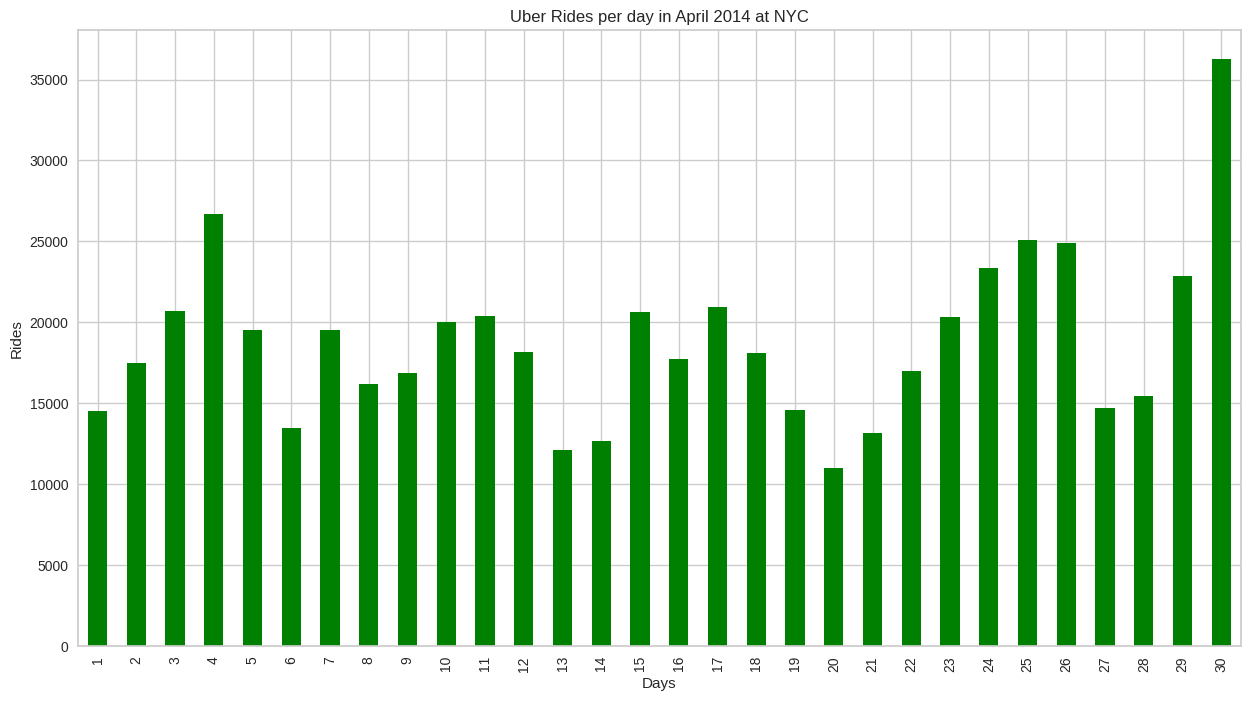

In [20]:
plt.figure(figsize=(15,8))
df['BinnedHour'].dt.day.value_counts().sort_index().plot(kind='bar',color='green')
plt.title('Uber Rides per day in April 2014 at NYC')
plt.xlabel('Days')
plt.ylabel('Rides')

In [13]:
DayMap={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day']=df['BinnedHour'].dt.weekday.map(DayMap)
df['Date']=df['BinnedHour'].dt.date
df['Day']=pd.Categorical(df['Day'],categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
df['Time']=df['BinnedHour'].dt.time

In [14]:
weekly_data = df.groupby(['Date','Day','Time']).count().dropna().rename(columns={'BinnedHour':'Rides'})['Rides'].reset_index()
weekly_data.head(10)

,Date,Day,Time,Rides
0,2014-04-01,Monday,00:00:00,0
1,2014-04-01,Monday,00:15:00,0
2,2014-04-01,Monday,00:30:00,0
3,2014-04-01,Monday,00:45:00,0
4,2014-04-01,Monday,01:00:00,0
5,2014-04-01,Monday,01:15:00,0
6,2014-04-01,Monday,01:30:00,0
7,2014-04-01,Monday,01:45:00,0
8,2014-04-01,Monday,02:00:00,0
9,2014-04-01,Monday,02:15:00,0


In [15]:
df.head(10)

,Date/Time,Lat,Lon,Base,BinnedHour,Day,Date,Time
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01 00:00:00,Tuesday,2014-04-01,00:00:00
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01 00:30:00,Tuesday,2014-04-01,00:30:00
5,2014-04-01 00:33:00,40.7383,-74.0403,B02512,2014-04-01 00:30:00,Tuesday,2014-04-01,00:30:00
6,2014-04-01 00:39:00,40.7223,-73.9887,B02512,2014-04-01 00:30:00,Tuesday,2014-04-01,00:30:00
7,2014-04-01 00:45:00,40.7620,-73.9790,B02512,2014-04-01 00:45:00,Tuesday,2014-04-01,00:45:00
8,2014-04-01 00:55:00,40.7524,-73.9960,B02512,2014-04-01 00:45:00,Tuesday,2014-04-01,00:45:00
9,2014-04-01 01:01:00,40.7575,-73.9846,B02512,2014-04-01 01:00:00,Tuesday,2014-04-01,01:00:00


APPLYING K MEANS CLUSTERING ON THE DATA

In [16]:
clus_k_ori = df[['Lat', 'Lon']] #defining an object class for latititude ang longitude values
clus_k_ori.dtypes

Lat    float64
Lon    float64
dtype: object

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

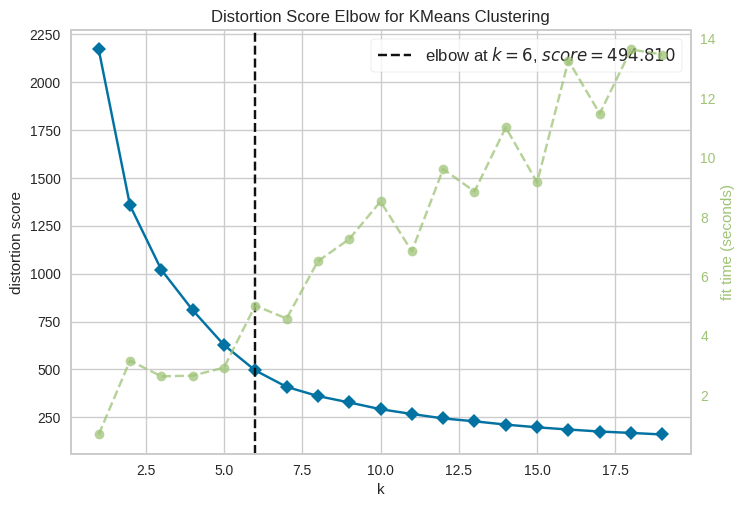

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
model_ori = KMeans() 
visualizer = KElbowVisualizer(model_ori, k = (1, 20)) #k = 1 to 19
visualizer.fit(clus_k_ori) #finding the optimal no of clusters elbow method
visualizer.show()

In [28]:
kmeans_ori = KMeans(n_clusters = 6, random_state = 0) #k = 6
kmeans_ori.fit(clus_k_ori)# k means of the data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [29]:
centroids_k_ori = kmeans_ori.cluster_centers_
centroids_k_ori
#values of the centroids of the clusters

array([[ 40.73110654, -73.99862488],
       [ 40.65961927, -73.77409006],
       [ 40.68859478, -73.96553808],
       [ 40.76552467, -73.97284736],
       [ 40.7005414 , -74.20167303],
       [ 40.79812622, -73.8690317 ]])

In [30]:
clocation_k_ori = pd.DataFrame(centroids_k_ori, columns = ['Latitude', 'Longitude'])
clocation_k_ori

,Latitude,Longitude
0,40.731107,-73.998625
1,40.659619,-73.774090
2,40.688595,-73.965538
3,40.765525,-73.972847
4,40.700541,-74.201673
5,40.798126,-73.869032


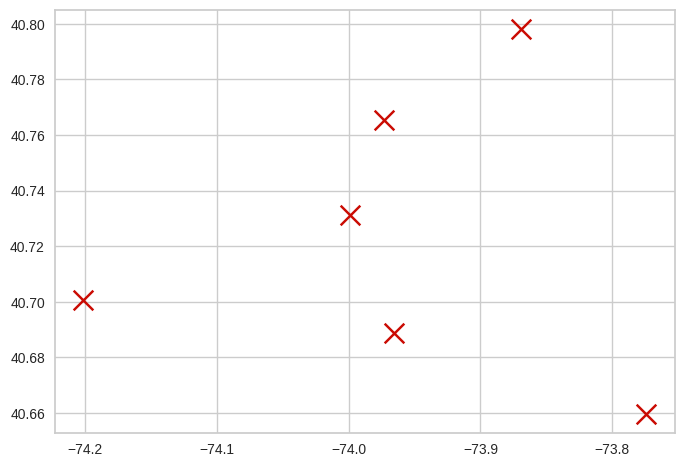

In [34]:
plt.scatter(clocation_k_ori['Longitude'],clocation_k_ori['Latitude'],  marker = "x", color = 'r', s = 200)
#ploting the location of centroids

In [35]:
centroid_k_ori = clocation_k_ori.values.tolist()

map_k_ori = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
for point in range(0, len(centroid_k_ori)):
    folium.Marker(centroid_k_ori[point], popup = centroid_k_ori[point]).add_to(map_k_ori)

map_k_ori
#showing the centroids location in map

In [36]:
label_k_ori = kmeans_ori.labels_
label_k_ori

array([3, 0, 0, ..., 0, 2, 2], dtype=int32)

In [37]:
df_new_k = df.copy()
df_new_k['Clusters'] = label_k_ori
df_new_k
#adding a row Clusters to show the cluster a point belongs to

,Date/Time,Lat,Lon,Base,BinnedHour,Day,Date,Time,Clusters
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01 00:00:00,Tuesday,2014-04-01,00:00:00,3
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,3
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01 00:30:00,Tuesday,2014-04-01,00:30:00,3
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014-04-30 23:15:00,Wednesday,2014-04-30,23:15:00,3
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014-04-30 23:15:00,Wednesday,2014-04-30,23:15:00,3
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014-04-30 23:30:00,Wednesday,2014-04-30,23:30:00,0
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014-04-30 23:30:00,Wednesday,2014-04-30,23:30:00,2


In [38]:
#Getting unique labels
u_labels = np.unique(label_k_ori)
u_labels

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [39]:
#array of cluster values
ymeans=np.copy(df_new_k['Clusters'] )
ymeans

array([3, 0, 0, ..., 0, 2, 2], dtype=int32)

In [40]:
df_new_k['Clusters']

0         3
1         0
2         0
3         3
4         3
         ..
564511    3
564512    3
564513    0
564514    2
564515    2
Name: Clusters, Length: 564516, dtype: int32

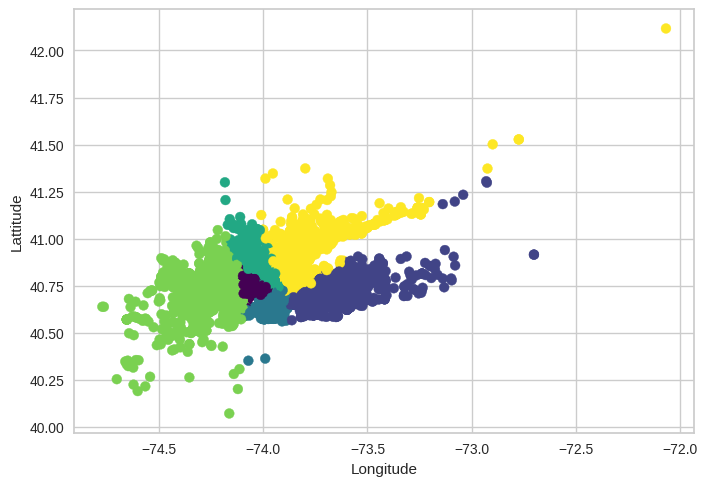

In [41]:
#scatter plot of the clusters
fig,ax=plt.subplots()
ax.scatter( df['Lon'], df['Lat'],c=ymeans, s=50, cmap='viridis')
ax.set_xlabel("Longitude")
ax.set_ylabel("Lattitude")
plt.show()

no of pickups in different clusters

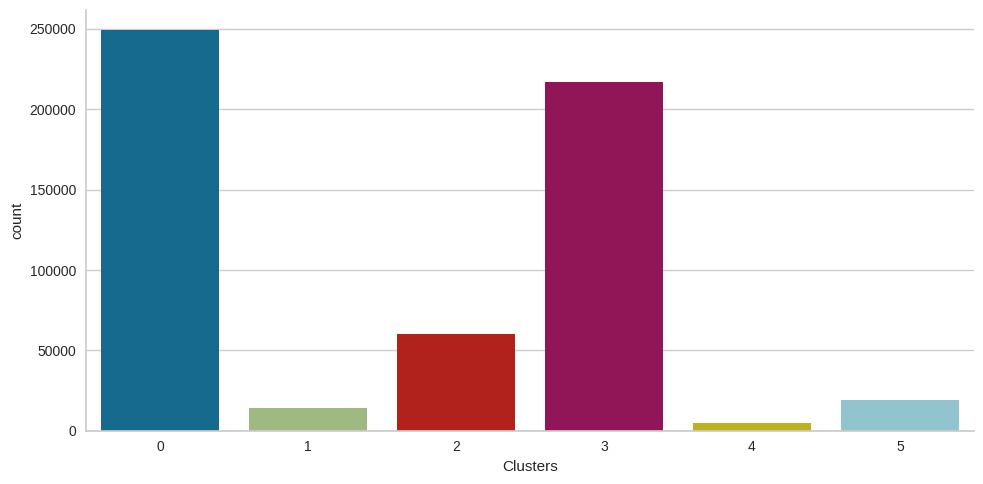

In [42]:
sb.catplot(data = df_new_k, x = "Clusters", kind = "count", aspect = 2)
#no of pickups in different clusters

In [43]:
df['hour']=df['Date/Time'].dt.hour
df

,Date/Time,Lat,Lon,Base,BinnedHour,Day,Date,Time,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01 00:00:00,Tuesday,2014-04-01,00:00:00,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01 00:30:00,Tuesday,2014-04-01,00:30:00,0
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014-04-30 23:15:00,Wednesday,2014-04-30,23:15:00,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014-04-30 23:15:00,Wednesday,2014-04-30,23:15:00,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014-04-30 23:30:00,Wednesday,2014-04-30,23:30:00,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014-04-30 23:30:00,Wednesday,2014-04-30,23:30:00,23


In [44]:
df_new_k['hour']=df_new_k['Date/Time'].dt.hour
df_new_k

,Date/Time,Lat,Lon,Base,BinnedHour,Day,Date,Time,Clusters,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01 00:00:00,Tuesday,2014-04-01,00:00:00,3,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,3,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01 00:30:00,Tuesday,2014-04-01,00:30:00,3,0
...,...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014-04-30 23:15:00,Wednesday,2014-04-30,23:15:00,3,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014-04-30 23:15:00,Wednesday,2014-04-30,23:15:00,3,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014-04-30 23:30:00,Wednesday,2014-04-30,23:30:00,0,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014-04-30 23:30:00,Wednesday,2014-04-30,23:30:00,2,23


plotting hour wise distribution of pickup counts

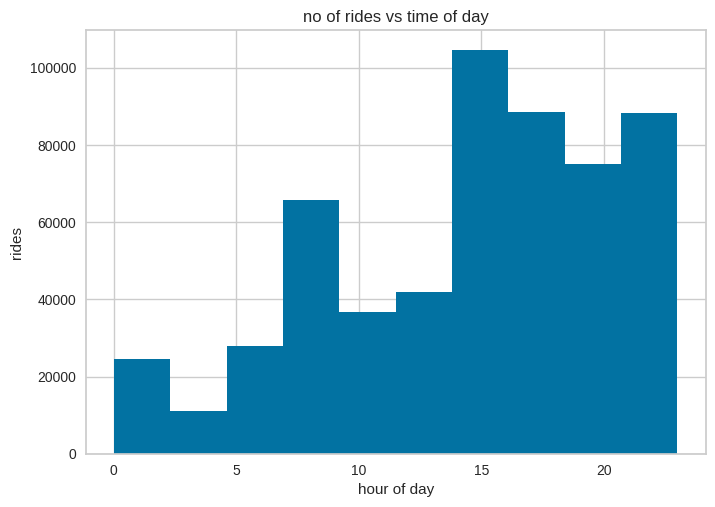

In [45]:
fig, ax = plt.subplots()
ax.hist(df_new_k['hour'])
ax.set_title("no of rides vs time of day")
ax.set_xlabel("hour of day")
ax.set_ylabel("rides")
plt.show()

data frames for individua clusters

In [46]:
df_cluster0=df_new_k[df_new_k['Clusters']==0]
df_cluster0

,Date/Time,Lat,Lon,Base,BinnedHour,Day,Date,Time,Clusters,hour
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0,0
5,2014-04-01 00:33:00,40.7383,-74.0403,B02512,2014-04-01 00:30:00,Tuesday,2014-04-01,00:30:00,0,0
6,2014-04-01 00:39:00,40.7223,-73.9887,B02512,2014-04-01 00:30:00,Tuesday,2014-04-01,00:30:00,0,0
8,2014-04-01 00:55:00,40.7524,-73.9960,B02512,2014-04-01 00:45:00,Tuesday,2014-04-01,00:45:00,0,0
...,...,...,...,...,...,...,...,...,...,...
564506,2014-04-30 23:00:00,40.7316,-73.9891,B02764,2014-04-30 23:00:00,Wednesday,2014-04-30,23:00:00,0,23
564507,2014-04-30 23:04:00,40.7267,-73.9937,B02764,2014-04-30 23:00:00,Wednesday,2014-04-30,23:00:00,0,23
564509,2014-04-30 23:15:00,40.7420,-74.0037,B02764,2014-04-30 23:15:00,Wednesday,2014-04-30,23:15:00,0,23
564510,2014-04-30 23:18:00,40.7514,-74.0066,B02764,2014-04-30 23:15:00,Wednesday,2014-04-30,23:15:00,0,23


In [47]:
df_cluster1=df_new_k[df_new_k['Clusters']==1]
df_cluster2=df_new_k[df_new_k['Clusters']==2]
df_cluster3=df_new_k[df_new_k['Clusters']==3]
df_cluster4=df_new_k[df_new_k['Clusters']==4]
df_cluster5=df_new_k[df_new_k['Clusters']==5]

plotting hour wise distribution of pickup counts for individual clusters

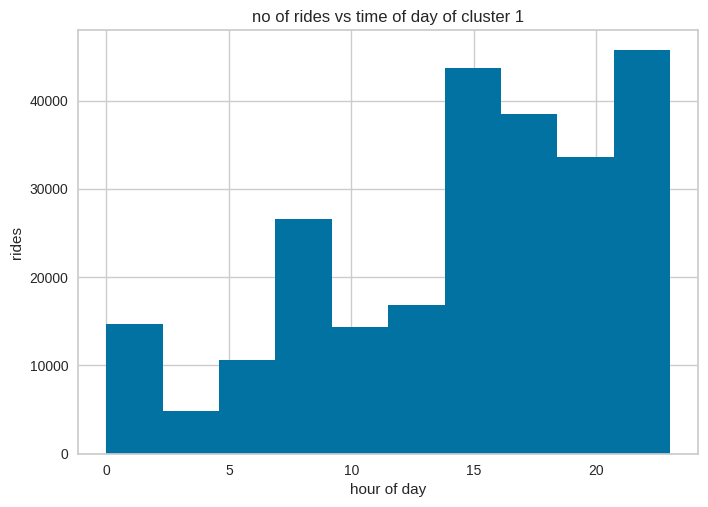

In [55]:
fig, ax = plt.subplots()
ax.hist(df_cluster0['hour'])
ax.set_title("no of rides vs time of day of cluster 1")
ax.set_xlabel("hour of day")
ax.set_ylabel("rides")
plt.show()

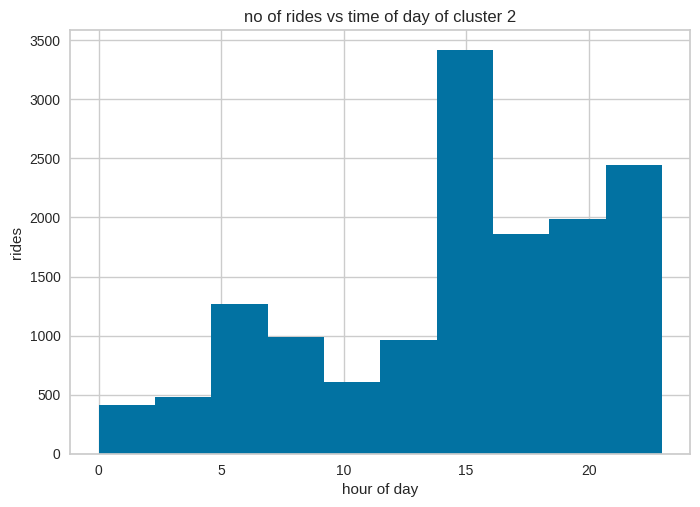

In [56]:
fig, ax = plt.subplots()
ax.hist(df_cluster1['hour'])
ax.set_title("no of rides vs time of day of cluster 2")
ax.set_xlabel("hour of day")
ax.set_ylabel("rides")
plt.show()

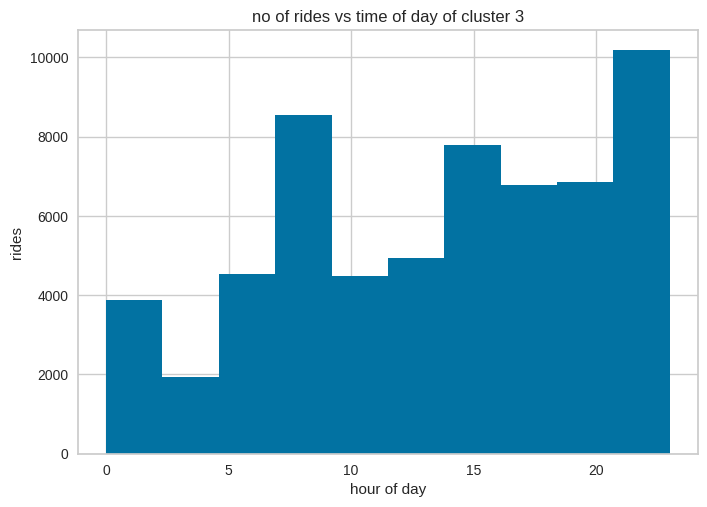

In [57]:
fig, ax = plt.subplots()
ax.hist(df_cluster2['hour'])
ax.set_title("no of rides vs time of day of cluster 3")
ax.set_xlabel("hour of day")
ax.set_ylabel("rides")
plt.show()

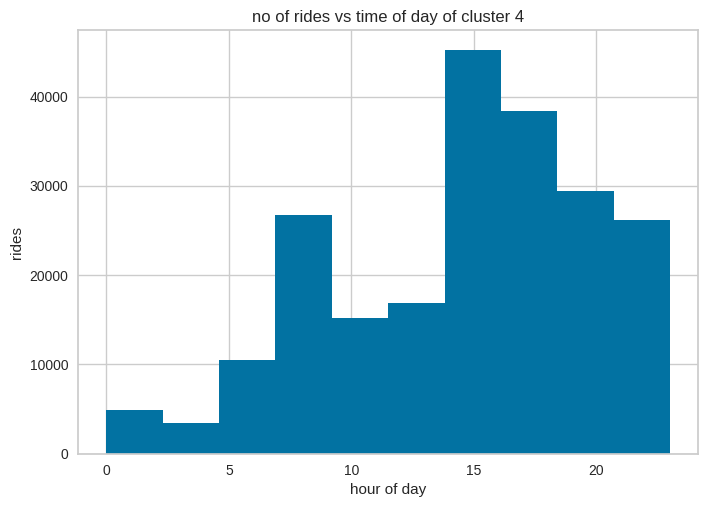

In [58]:
fig, ax = plt.subplots()
ax.hist(df_cluster3['hour'])
ax.set_title("no of rides vs time of day of cluster 4")
ax.set_xlabel("hour of day")
ax.set_ylabel("rides")
plt.show()

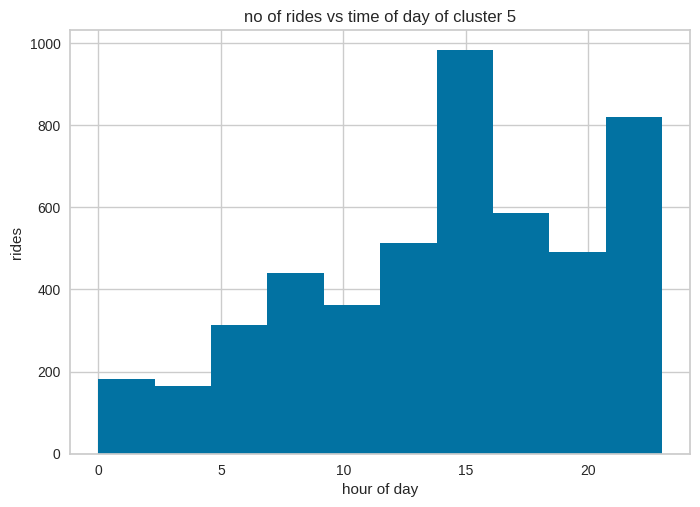

In [59]:
fig, ax = plt.subplots()
ax.hist(df_cluster4['hour'])
ax.set_title("no of rides vs time of day of cluster 5")
ax.set_xlabel("hour of day")
ax.set_ylabel("rides")
plt.show()

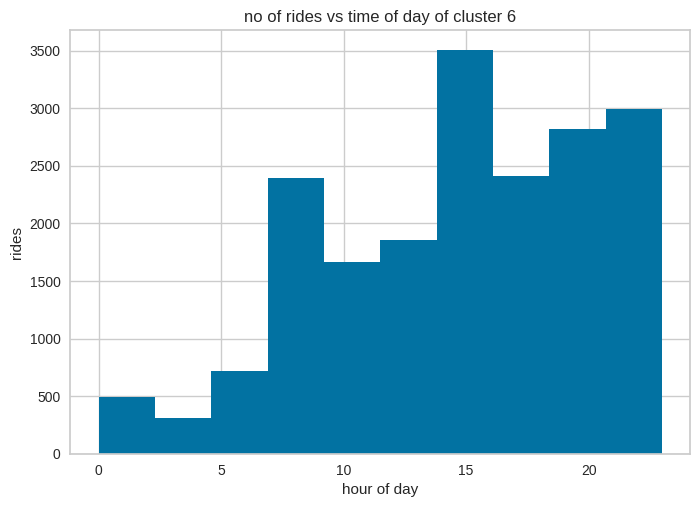

In [60]:
fig, ax = plt.subplots()
ax.hist(df_cluster5['hour'])
ax.set_title("no of rides vs time of day of cluster 6")
ax.set_xlabel("hour of day")
ax.set_ylabel("rides")
plt.show()

No of pickups vs the day of week

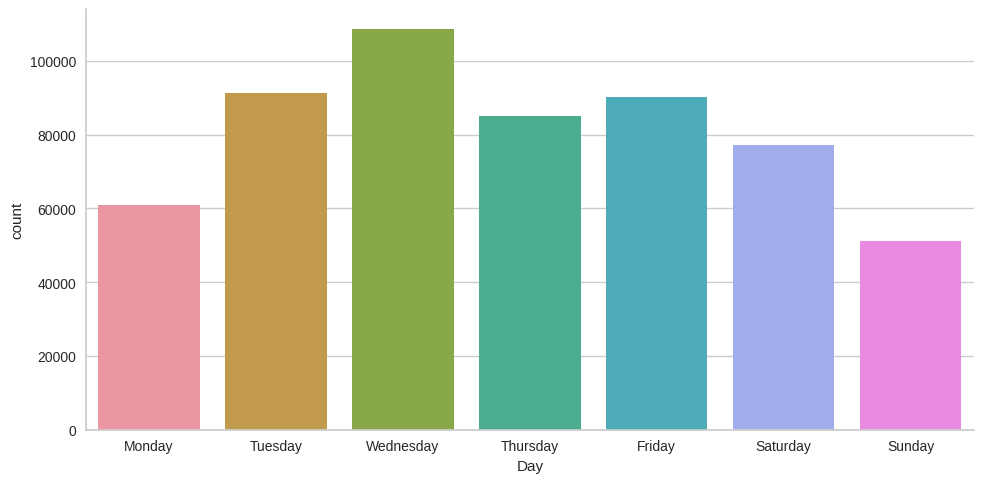

In [61]:
sb.catplot(data = df, x = "Day", kind = "count", aspect = 2)

In [62]:
weekday=['Monday','Tuesday','Wednesday','Thursday','Friday']
df_weekday=df[df['Day'].isin(weekday)]
df_weekday 

,Date/Time,Lat,Lon,Base,BinnedHour,Day,Date,Time,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01 00:00:00,Tuesday,2014-04-01,00:00:00,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01 00:30:00,Tuesday,2014-04-01,00:30:00,0
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014-04-30 23:15:00,Wednesday,2014-04-30,23:15:00,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014-04-30 23:15:00,Wednesday,2014-04-30,23:15:00,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014-04-30 23:30:00,Wednesday,2014-04-30,23:30:00,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014-04-30 23:30:00,Wednesday,2014-04-30,23:30:00,23


No of pickups vs the day of week for weekdays

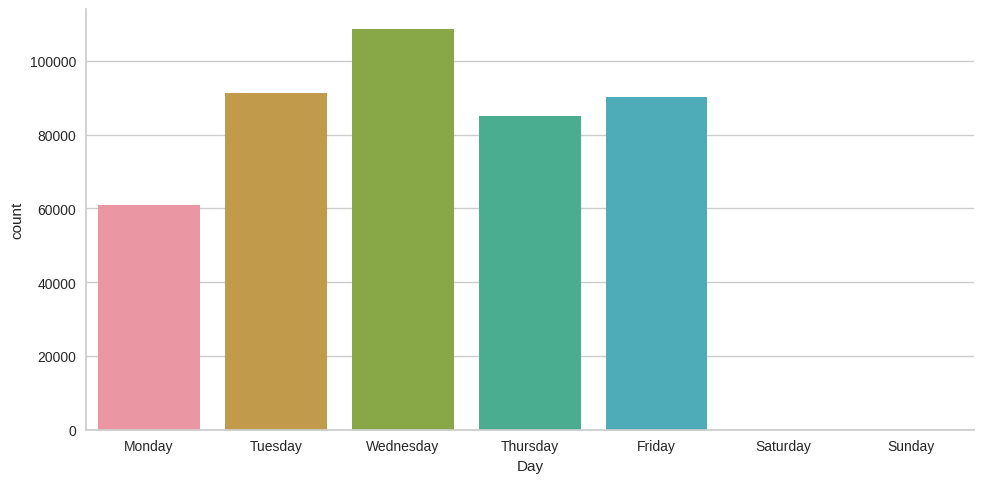

In [63]:
sb.catplot(data = df_weekday, x = "Day", kind = "count", aspect = 2)

Applyin K means to the uber pickup data for week days

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

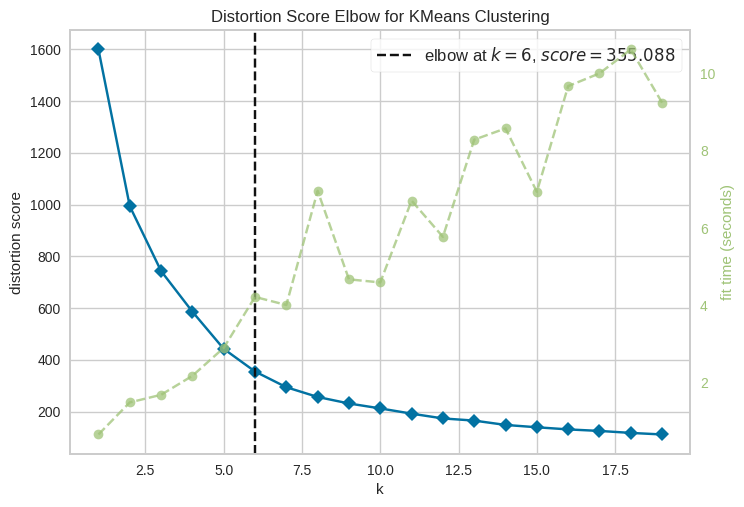

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
clus_week = df_weekday[['Lat', 'Lon']]
model_week = KMeans()
visualizer = KElbowVisualizer(model_week, k = (1, 20)) #k = 1 to 19
visualizer.fit(clus_week)#finding the optimal no of clusters elbow method
visualizer.show()

In [48]:
kmeans_week= KMeans(n_clusters = 6, random_state = 0) #k = 6
kmeans_week.fit(clus_week)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [49]:
centroids_k_week= kmeans_week.cluster_centers_
centroids_k_week

array([[ 40.73123574, -73.99856958],
       [ 40.76503227, -73.97321374],
       [ 40.65881445, -73.7745898 ],
       [ 40.68837502, -73.96663869],
       [ 40.69923329, -74.20295801],
       [ 40.79707893, -73.86899895]])

In [50]:
clocation_k_week = pd.DataFrame(centroids_k_week, columns = ['Latitude', 'Longitude'])
clocation_k_week

,Latitude,Longitude
0,40.731236,-73.998570
1,40.765032,-73.973214
2,40.658814,-73.774590
3,40.688375,-73.966639
4,40.699233,-74.202958
5,40.797079,-73.868999


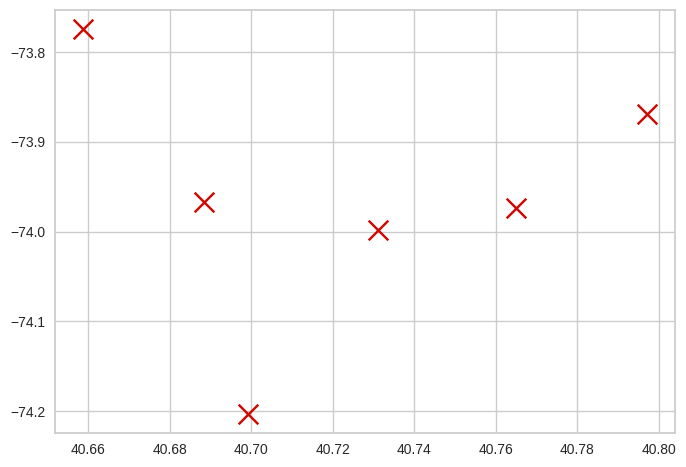

In [51]:
plt.scatter(clocation_k_week['Longitude'],clocation_k_week['Latitude'],  marker = "x", color = 'r', s = 200)
# locations of the centers of clusters

In [52]:
centroid_k_week= clocation_k_week.values.tolist()

map_k_week = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
for point in range(0, len(centroid_k_week)):
    folium.Marker(centroid_k_week[point], popup = centroid_k_week[point]).add_to(map_k_week)

map_k_week
#marking the centeroid points in map

In [53]:
label_k_week = kmeans_week.labels_
label_k_week

array([1, 0, 0, ..., 0, 3, 3], dtype=int32)

In [54]:
df_new_week = df_weekday.copy()
df_new_week['Clusters'] = label_k_week
df_new_week

,Date/Time,Lat,Lon,Base,BinnedHour,Day,Date,Time,hour,Clusters
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01 00:00:00,Tuesday,2014-04-01,00:00:00,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01 00:15:00,Tuesday,2014-04-01,00:15:00,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01 00:30:00,Tuesday,2014-04-01,00:30:00,0,1
...,...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014-04-30 23:15:00,Wednesday,2014-04-30,23:15:00,23,1
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014-04-30 23:15:00,Wednesday,2014-04-30,23:15:00,23,1
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014-04-30 23:30:00,Wednesday,2014-04-30,23:30:00,23,0
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014-04-30 23:30:00,Wednesday,2014-04-30,23:30:00,23,3


In [55]:
ymeans=np.copy(df_new_week['Clusters'] )
ymeans

array([1, 0, 0, ..., 0, 3, 3], dtype=int32)

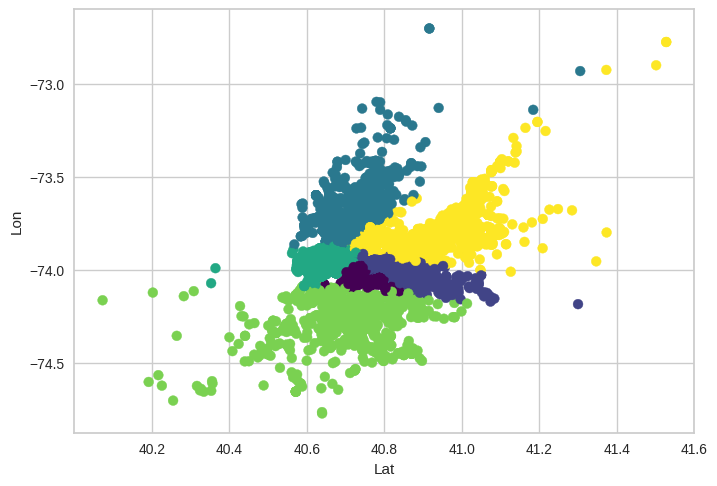

In [56]:
fig,ax=plt.subplots()
ax.scatter(df_weekday['Lon'], df_weekday['Lat'], c=ymeans, s=50, cmap='viridis')
ax.set_xlabel("Longitude")
ax.set_ylabel("Lattitude")
plt.show()
# scatter plot of the clusters

no of pickups in different clusters for weekdays data

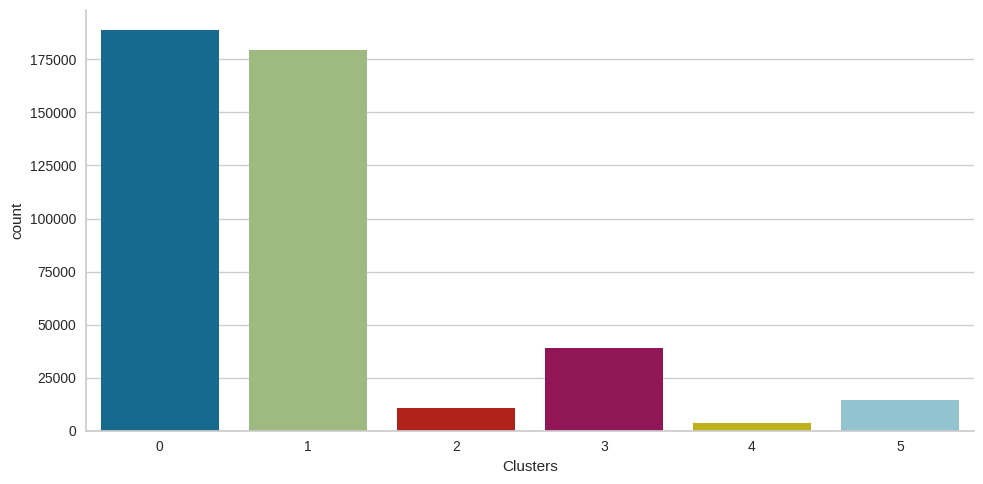

In [57]:
sb.catplot(data = df_new_week, x = "Clusters", kind = "count", aspect = 2)

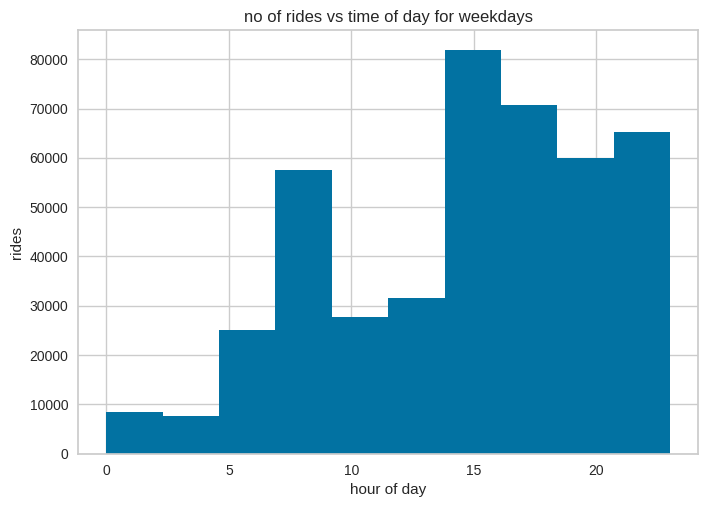

In [58]:
fig, ax = plt.subplots()
ax.hist(df_new_week['hour'])
ax.set_title("no of rides vs time of day for weekdays")
ax.set_xlabel("hour of day")
ax.set_ylabel("rides")
plt.show()

applying k means to weekend data

In [59]:
weekend=['Saturday','Sunday']
df_weekend=df[df['Day'].isin(weekend)]
df_weekend

,Date/Time,Lat,Lon,Base,BinnedHour,Day,Date,Time,hour
5656,2014-04-05 00:00:00,40.7690,-73.9825,B02512,2014-04-05 00:00:00,Saturday,2014-04-05,00:00:00,0
5657,2014-04-05 00:00:00,40.7594,-73.9641,B02512,2014-04-05 00:00:00,Saturday,2014-04-05,00:00:00,0
5658,2014-04-05 00:01:00,40.7113,-74.0173,B02512,2014-04-05 00:00:00,Saturday,2014-04-05,00:00:00,0
5659,2014-04-05 00:02:00,40.8060,-73.9652,B02512,2014-04-05 00:00:00,Saturday,2014-04-05,00:00:00,0
5660,2014-04-05 00:04:00,40.7211,-74.0042,B02512,2014-04-05 00:00:00,Saturday,2014-04-05,00:00:00,0
...,...,...,...,...,...,...,...,...,...
563273,2014-04-27 22:59:00,40.7741,-73.8725,B02764,2014-04-27 22:45:00,Sunday,2014-04-27,22:45:00,22
563274,2014-04-27 23:23:00,40.7782,-73.9625,B02764,2014-04-27 23:15:00,Sunday,2014-04-27,23:15:00,23
563275,2014-04-27 23:33:00,40.6449,-73.7823,B02764,2014-04-27 23:30:00,Sunday,2014-04-27,23:30:00,23
563276,2014-04-27 23:35:00,40.7278,-73.9822,B02764,2014-04-27 23:30:00,Sunday,2014-04-27,23:30:00,23


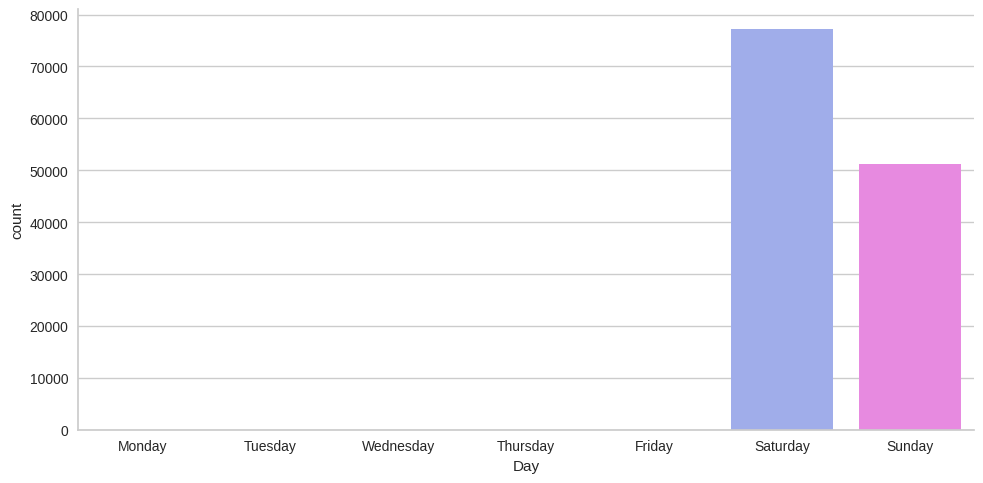

In [60]:
sb.catplot(data = df_weekend, x = "Day", kind = "count", aspect = 2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

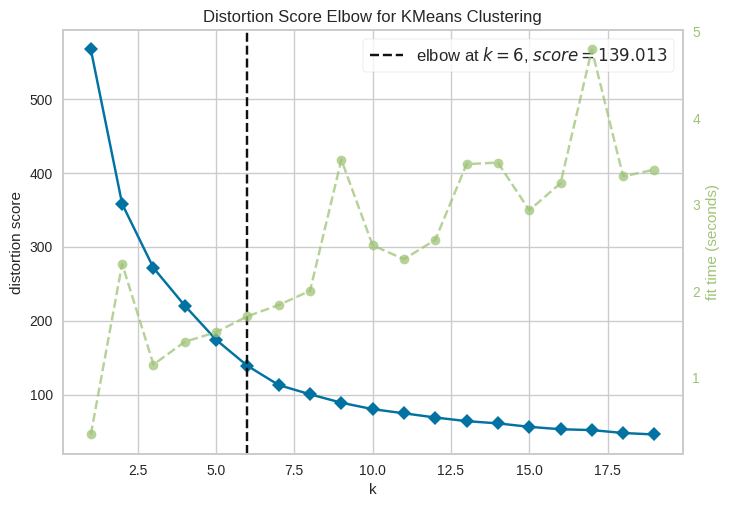

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
clus_end = df_weekend[['Lat', 'Lon']]
model_end = KMeans()
visualizer = KElbowVisualizer(model_end, k = (1, 20)) #k = 1 to 19
visualizer.fit(clus_end)
visualizer.show()

In [62]:
kmeans_end= KMeans(n_clusters = 6, random_state = 0) #k = 6
kmeans_end.fit(clus_end)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [63]:
centroids_k_end= kmeans_end.cluster_centers_
centroids_k_end

array([[ 40.73101575, -73.99861342],
       [ 40.66152544, -73.77266923],
       [ 40.70494533, -74.19743642],
       [ 40.76851991, -73.97042873],
       [ 40.68912186, -73.96349792],
       [ 40.80180009, -73.86563915]])

In [64]:
clocation_k_end = pd.DataFrame(centroids_k_end, columns = ['Latitude', 'Longitude'])
clocation_k_end

,Latitude,Longitude
0,40.731016,-73.998613
1,40.661525,-73.772669
2,40.704945,-74.197436
3,40.768520,-73.970429
4,40.689122,-73.963498
5,40.801800,-73.865639


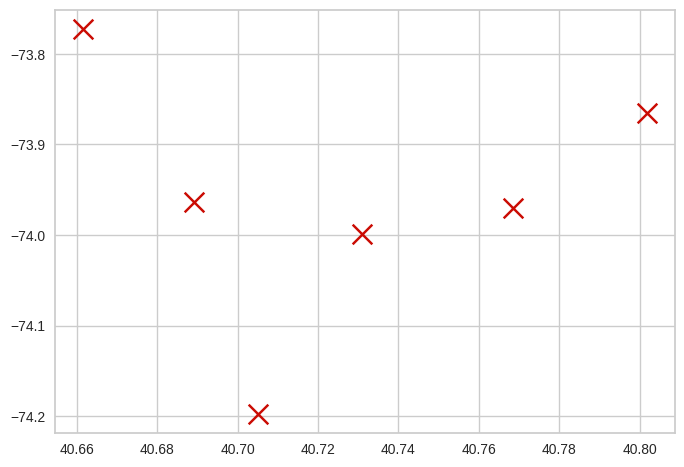

In [65]:
plt.scatter(clocation_k_end['Longitude'], clocation_k_end['Latitude'], marker = "x", color = 'r', s = 200)

In [66]:
centroid_k_end= clocation_k_end.values.tolist()

map_k_end = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
for point in range(0, len(centroid_k_end)):
    folium.Marker(centroid_k_end[point], popup = centroid_k_end[point]).add_to(map_k_end)

map_k_end

In [67]:
label_k_end = kmeans_end.labels_
label_k_end

array([3, 3, 0, ..., 1, 0, 2], dtype=int32)

In [68]:
df_new_end = df_weekend.copy()
df_new_end['Clusters'] = label_k_end
df_new_end

,Date/Time,Lat,Lon,Base,BinnedHour,Day,Date,Time,hour,Clusters
5656,2014-04-05 00:00:00,40.7690,-73.9825,B02512,2014-04-05 00:00:00,Saturday,2014-04-05,00:00:00,0,3
5657,2014-04-05 00:00:00,40.7594,-73.9641,B02512,2014-04-05 00:00:00,Saturday,2014-04-05,00:00:00,0,3
5658,2014-04-05 00:01:00,40.7113,-74.0173,B02512,2014-04-05 00:00:00,Saturday,2014-04-05,00:00:00,0,0
5659,2014-04-05 00:02:00,40.8060,-73.9652,B02512,2014-04-05 00:00:00,Saturday,2014-04-05,00:00:00,0,3
5660,2014-04-05 00:04:00,40.7211,-74.0042,B02512,2014-04-05 00:00:00,Saturday,2014-04-05,00:00:00,0,0
...,...,...,...,...,...,...,...,...,...,...
563273,2014-04-27 22:59:00,40.7741,-73.8725,B02764,2014-04-27 22:45:00,Sunday,2014-04-27,22:45:00,22,5
563274,2014-04-27 23:23:00,40.7782,-73.9625,B02764,2014-04-27 23:15:00,Sunday,2014-04-27,23:15:00,23,3
563275,2014-04-27 23:33:00,40.6449,-73.7823,B02764,2014-04-27 23:30:00,Sunday,2014-04-27,23:30:00,23,1
563276,2014-04-27 23:35:00,40.7278,-73.9822,B02764,2014-04-27 23:30:00,Sunday,2014-04-27,23:30:00,23,0


In [69]:
ymeans=np.copy(df_new_end['Clusters'] )
ymeans

array([3, 3, 0, ..., 1, 0, 2], dtype=int32)

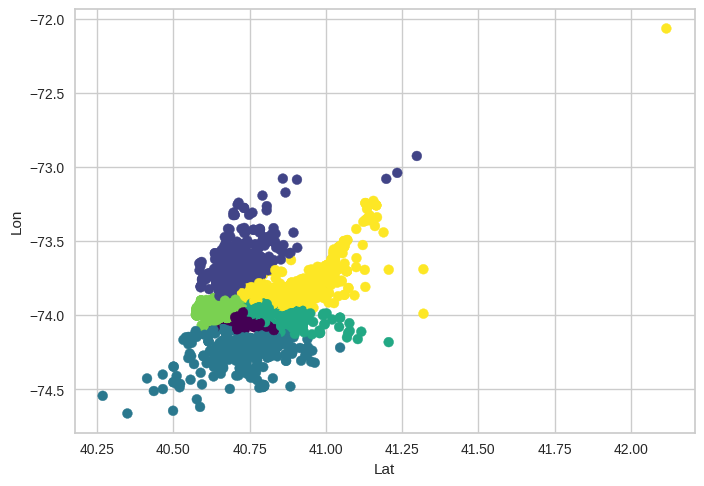

In [70]:
fig,ax=plt.subplots()
ax.scatter(df_weekend['Lon'],df_weekend['Lat'],  c=ymeans, s=50, cmap='viridis')
ax.set_xlabel("Longitude")
ax.set_ylabel("Lattitude")
plt.show()

no of pickups in different clusters for weekend data

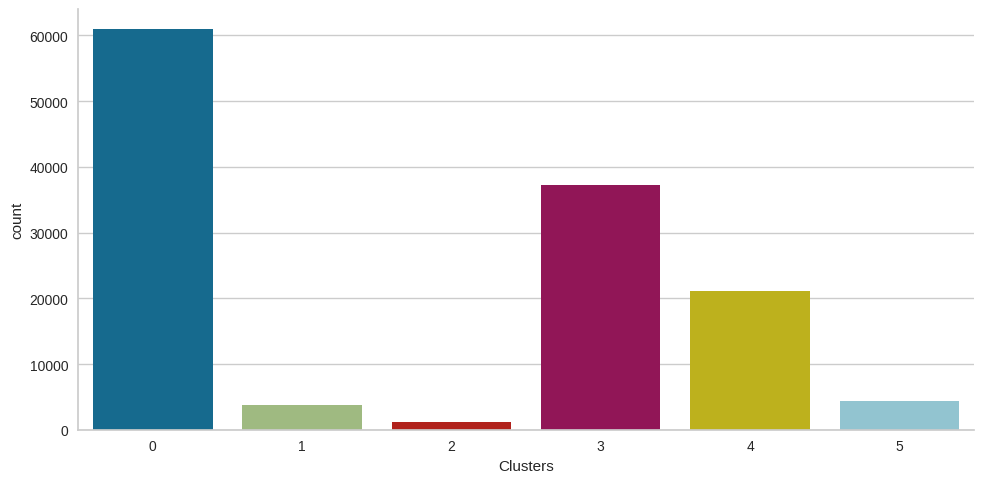

In [71]:
sb.catplot(data = df_new_end, x = "Clusters", kind = "count", aspect = 2)

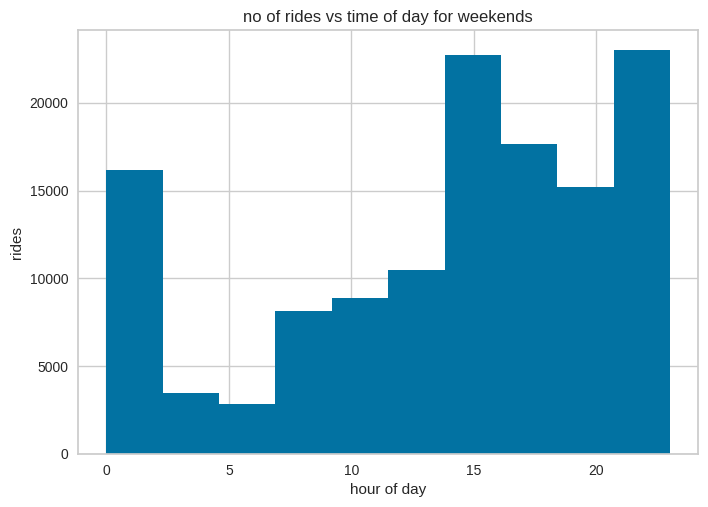

In [72]:
fig, ax = plt.subplots()
ax.hist(df_new_end['hour'])
ax.set_title("no of rides vs time of day for weekends")
ax.set_xlabel("hour of day")
ax.set_ylabel("rides")
plt.show()